# Correlation and Covariance

## Covariance

Covariance measures how much two random variables change together. In other words, it assesses whether larger values of one variable tend to correspond to larger or smaller values of the other variable.

The formula for covariance between two variables X and Y is:

$cov(X, Y) = \Sigma [(X_i - \mu X)  (Y_i - \mu Y)] / (n - 1)$

Where:

-   $X_i$ and $Y_i$ are the individual data points
-   $\mu X$ and $\mu Y$ are the means of $X$ and $Y$, respectively
-   $n$ is the number of data points

Interpretation:

-   Positive covariance: Indicates that X and Y tend to increase or decrease together.
-   Negative covariance: Indicates that X tends to increase when Y decreases, and vice versa.
-   Zero covariance: Indicates no linear relationship between X and Y.

## Correlation

Correlation measures the strength and direction of the *linear* relationship between two variables. It is simply a standardized version of covariance, making it easier to compare relationships across different datasets.

The most common type of correlation is the Pearson correlation coefficient, calculated as:

$r = \frac{cov(X, Y){222} / (\sigma X \sigma Y)$


Where:

-   cov(X, Y) is the covariance between $X$ and $Y$
-   $\sigma X$ and $\sigma Y$ are the standard deviations of $X$ and $Y$, respectively

Interpretation of Pearson Correlation Coefficient ($r$):

-   -1 ≤ $r$ ≤ 1
-   $r$ = 1: Perfect positive linear correlation
-   $r$ = -1: Perfect negative linear correlation
-   $r$ = 0: No linear correlation
-   The closer |r| is to 1, the stronger the linear relationship.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_and_plot(data, title):
    """
    Calculates covariance and correlation, and generates a single scatter plot
    using the subplots structure (even though it's one plot).

    Args:
        data (pd.DataFrame): DataFrame with columns 'X' and 'Y'.
        title (str): Title for the plot.

    Returns:
        None (displays the plot)
    """

    covariance = np.cov(data['X'], data['Y'])[0, 1]
    correlation = np.corrcoef(data['X'], data['Y'])[0, 1]

    print(f"\n--- {title} ---")
    print(f"Covariance: {covariance}")
    print(f"Correlation: {correlation}")

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # Create a figure and a single axes object

    ax.scatter(data['X'], data['Y'])
    ax.set_xlabel('X')  # Use ax.set_xlabel
    ax.set_ylabel('Y')  # Use ax.set_ylabel
    ax.set_title(title)  # Use ax.set_title
    ax.grid(True, linestyle='--', alpha=0.6)
    fig.tight_layout()  # Use fig.tight_layout (or plt.tight_layout)
    plt.show()



--- Positive Correlation ---
Covariance: 1.5
Correlation: 0.7745966692414834


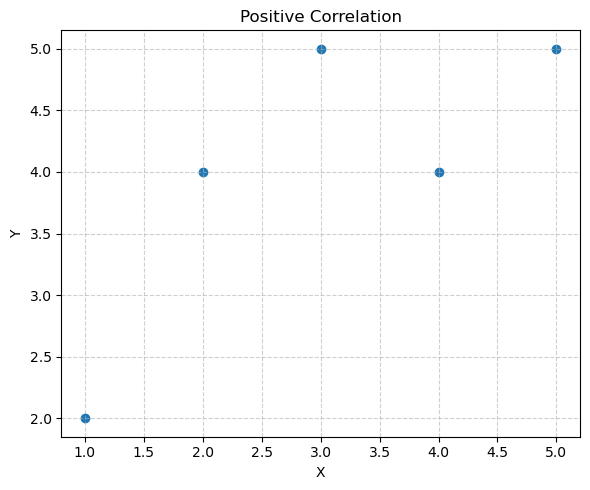

In [7]:
# Example 1: Positive Correlation
data1 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5]})
analyze_and_plot(data1, 'Positive Correlation')


--- Negative Correlation ---
Covariance: -2.5
Correlation: -0.9999999999999999


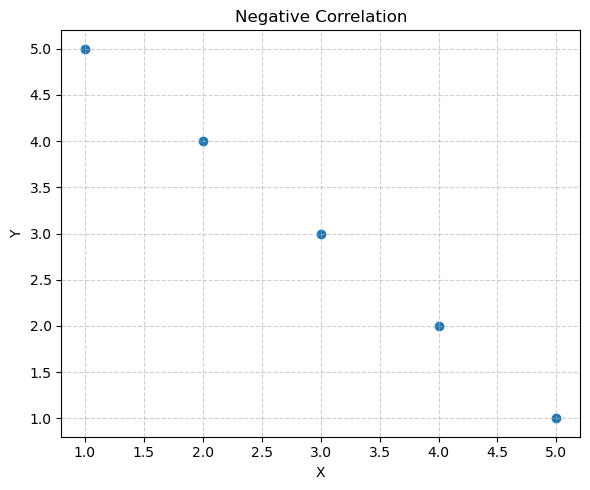

In [9]:
# Example 2: Negative Correlation
data2 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [5, 4, 3, 2, 1]})
analyze_and_plot(data2, 'Negative Correlation')


--- No Correlation ---
Covariance: 0.0
Correlation: 0.0


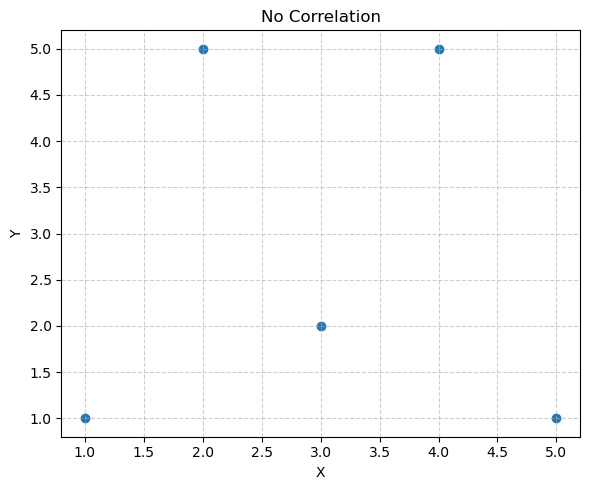

In [10]:
# Example 3: No Correlation
data3 = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [1, 5, 2, 5, 1]})
analyze_and_plot(data3, 'No Correlation')


--- Non-linear relationship ---
Covariance: 0.0
Correlation: 0.0


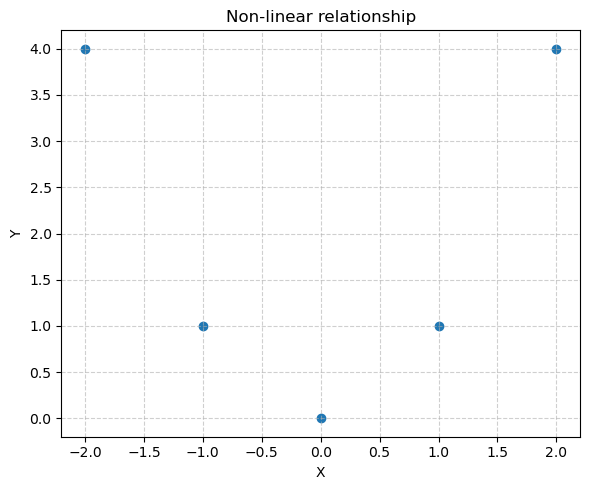

In [11]:
# Example 4: Non-linear relationship
data4 = pd.DataFrame({'X': [-2, -1, 0, 1, 2], 'Y': [4, 1, 0, 1, 4]})
analyze_and_plot(data4, 'Non-linear relationship')


--- Y = X + Gaussian Noise ---
Covariance: 8.076896688668507
Correlation: 0.8067952995586773


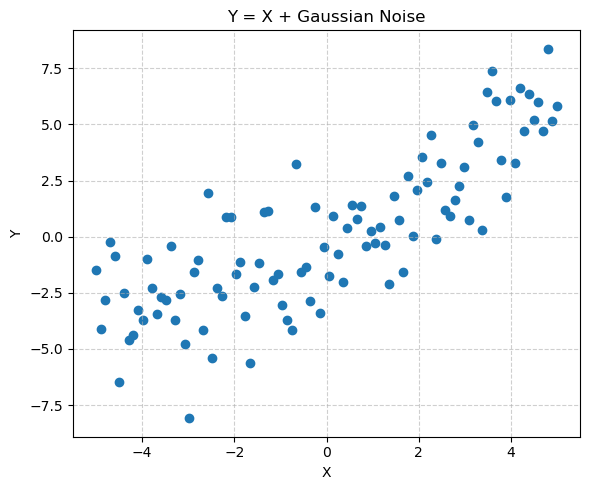

In [12]:
# --- Example Usage (y = x + Gaussian Noise) ---

np.random.seed(0)  # for reproducibility
x = np.linspace(-5, 5, 100)
noise = np.random.normal(0, 2, 100)  # Mean 0, standard deviation 2
y = x + noise

data = pd.DataFrame({'X': x, 'Y': y})
analyze_and_plot(data, 'Y = X + Gaussian Noise')

## exercise

if you want to apply what you learnt earlier, you can add the regression line to the plot and see how close it is to the 1-1 line

## Statistical Significance of Correlation

While the correlation coefficient (r) measures the strength and direction of a linear relationship, it doesn't tell us if that relationship is statistically significant. Statistical significance indicates whether the observed correlation is likely a true relationship in the population or simply due to random chance in our sample.

**Hypothesis Testing**

To determine statistical significance, we perform hypothesis testing:

1.  **Null Hypothesis (H0):** There is no correlation between the variables in the population ($r = 0$).
2.  **Alternative Hypothesis (H1):** There is a correlation between the variables in the population ($r \ne 0$).

**T-test**

A common way to test the significance of the Pearson correlation coefficient is using a t-test. The t-statistic is calculated as:

$t = r  \sqrt{(n - 2)} / \sqrt{(1 - r^2)}$


Where:

* r is the sample correlation coefficient
* n is the sample size
* The degrees of freedom (df) for the t-distribution are n - 2


## NOTE

he degrees of freedom is set to n-2 assuming that the observations are INDEPENDENT... if you are applying the test to a timeseries with a significant temporal autocorrelation then this assumption does not hold well and the true degrees of freedom may be a lot lower.

**P-value**

The calculated t-statistic is compared to the t-distribution with n - 2 degrees of freedom to obtain a p-value. The p-value represents the probability of observing a correlation as strong as (or stronger than) the one we found in our sample, *assuming that there is no correlation in the population* (i.e., assuming the null hypothesis is true).

**Significance Level (α)**

We set a significance level ($\alpha$), typically 0.05. If the p-value is less than $\alpha$, we reject the null hypothesis and conclude that the correlation is statistically significant.

**Sample Size and Significance**

**The required magnitude of the correlation coefficient (r) to achieve statistical significance decreases as the sample size (n) increases.**

* **Small Sample Sizes:** With small sample sizes, even a moderately strong correlation might not be statistically significant. Random fluctuations have a larger influence, making it harder to distinguish a true relationship from chance. Therefore, you need a larger *r* to be confident it's not a fluke.
  
* **Large Sample Sizes:** With large sample sizes, even a weak correlation can be statistically significant. Large samples provide more statistical power, reducing the impact of random variations.  A smaller *r* can be deemed statistically significant because you have more data to support that the small effect is real.

**Important Implications**

* **Practical vs. Statistical Significance:** A statistically significant correlation doesn't necessarily imply practical importance. A very large sample might yield a significant result for a tiny, practically meaningless correlation. Always consider the context and the magnitude of the effect.
  
* **Overemphasis on P-values:** Avoid solely relying on p-values. Report the correlation coefficient (r) along with confidence intervals to provide a more complete picture of the relationship.

In [17]:
from scipy import stats

def test_correlation_significance():
    """
    Generates two random number series, calculates correlation, 
    and performs a significance test. Returns True if significant, False otherwise.
    """
    # Generate two random number series
    series1 = np.random.rand(10)
    series2 = np.random.rand(10)

    # Calculate the Pearson correlation coefficient using np.corrcoef
    correlation_matrix = np.corrcoef(series1, series2)
    correlation = correlation_matrix[0, 1]

    # Calculate the t-statistic
    n = len(series1)
    t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation**2))

    # Calculate the p-value (two-tailed test)
    degrees_of_freedom = n - 2
    p_value = stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2

    # Determine significance at the 95% level (alpha = 0.05)
    alpha = 0.05
    
    # Print the results
    print(f"Correlation coefficient: {correlation:.3f}", f"T-statistic: {t_statistic:.3f}")
    
    return p_value < alpha

In [19]:
# Run the test 20 times and count significant results
num_trials = 20
significant_count = 0
for _ in range(num_trials):
    if test_correlation_significance():
        significant_count += 1

# Calculate the proportion of significant results
proportion_significant = significant_count / num_trials

# Print the result
print(f"Out of {num_trials} trials, the correlation was statistically significant in {significant_count} cases.")
print(f"Proportion of significant results: {proportion_significant:.2f}")

Correlation coefficient: -0.378 T-statistic: -1.156
Correlation coefficient: -0.297 T-statistic: -0.880
Correlation coefficient: 0.019 T-statistic: 0.054
Correlation coefficient: -0.534 T-statistic: -1.785
Correlation coefficient: -0.238 T-statistic: -0.693
Correlation coefficient: 0.220 T-statistic: 0.637
Correlation coefficient: 0.225 T-statistic: 0.652
Correlation coefficient: -0.697 T-statistic: -2.747
Correlation coefficient: -0.118 T-statistic: -0.336
Correlation coefficient: -0.510 T-statistic: -1.676
Correlation coefficient: -0.209 T-statistic: -0.604
Correlation coefficient: -0.477 T-statistic: -1.536
Correlation coefficient: 0.471 T-statistic: 1.508
Correlation coefficient: 0.439 T-statistic: 1.382
Correlation coefficient: 0.281 T-statistic: 0.828
Correlation coefficient: 0.191 T-statistic: 0.550
Correlation coefficient: 0.007 T-statistic: 0.019
Correlation coefficient: 0.778 T-statistic: 3.503
Correlation coefficient: 0.166 T-statistic: 0.475
Correlation coefficient: 0.498 T

# correlation and causality 

Beware of attributing causality to relationships found. This can be the case but be careful to think about the processes involved. The reason we are stating this is because the next use example will allow us to assess the impact of ENSO on global weather.

# exercise 

Get together in groups and look at the definitions of correlation and covariance. If I were to ask you to calculate how much ENSO impacts temperature or rainfall globally, how could you do this with either of th